## Analyzing Positive Cases of Covid-19 in Ontario, Canada and The Relation with Municipal Characteristics

### 1. Introduction

#### 1.1. Idea
Covid-19 virus spreads globally, affecting most, if not all, countries in the world. Canada is also one of the country affected by Covid-19. Based on recent data, Canada has 40,190 positive cases (https://www.worldometers.info/coronavirus/country/canada/). 

This project will focus on the analysis of positive cases in the province of Ontario. In Ontario province alone, based on the data retrieved on 22nd April 2020, there were 12,245 positive cases. This corresponds to approximately 30% of the total case.  

The main idea is to analyze the region's characteristic in Ontario by using Foursquare location data which may contribute to the Covid-19 spread.

#### 1.2. Interest
Some countries in the world are quite successful in containing the Covid-19 spread, and unfortunately some are not. 

Among the countries which are quite successful at the moment, they implement an aggresive measure by closing some public gathering places, requesting their citizen to do social distancing, limiting people mobility and also closing the borders. 

Based on the broad topic, the goal of the project here is to help relevant stakeholders in Ontario by finding out which region's characteristic has bigger impact and whether social distancing measure really helps in limiting the spread

### 2. Data

#### 2.1. List of municipality in Ontario
The data was scraped from Wikipedia site: https://en.wikipedia.org/wiki/List_of_municipalities_in_Ontario. 

The original data was pre-processed so that only the features of interest were taken. 

The features are:
- Municipal name
- Population
- Area
- Density

For the purpose of the project, we only look at single-tier Municipality and lower-tier Municipality so that the information can be lined up with the Covid-19 data.

In total there are 414 Municipal in Ontario. 

For simplicity, the data would be sorted by the population number


##### Here is the top-20 Municipal based on population:

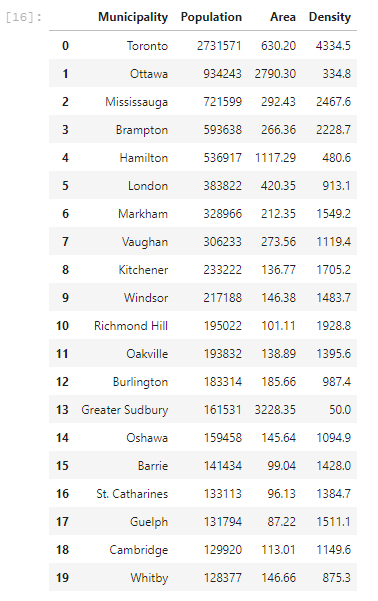

In [43]:
from IPython.display import Image
Image("img/mun.png")

#### 2.2. Positive Cases in Ontario
The data was downloaded from publicly available data in https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario.

It contains all positive cases information in Ontario.

Only the following features were selected for the analysis:
- Case ID and date
- The location where the case was reported
- Case acquisition information, this means how the person got infected (after contact tracing done by the public health authority)

##### Here is the sample of the data (using dataframe.head(10))

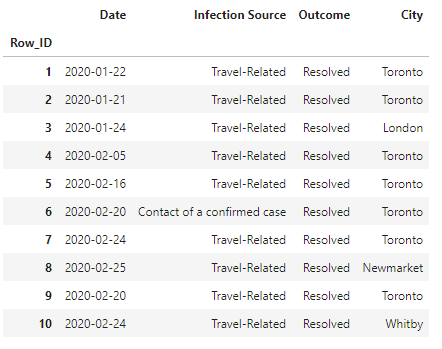

In [44]:
Image("img/covpos.png")

#### 2.3. Foursquare Location
The data of top 50 venues in the municipal was retrieved using Foursquare API

Using the Coursera assignment as the base, the municipal characteristics were analyzed based on the venue category

##### Here is the snapshot of the data retrieved from Foursquare

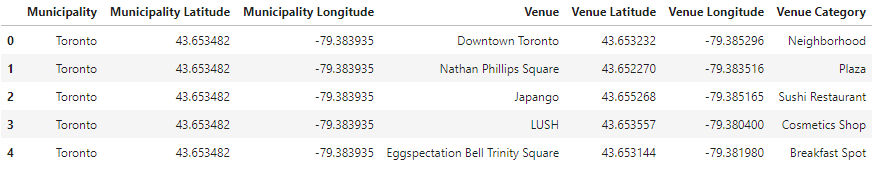

In [45]:
Image("img/foursquare_2.png")

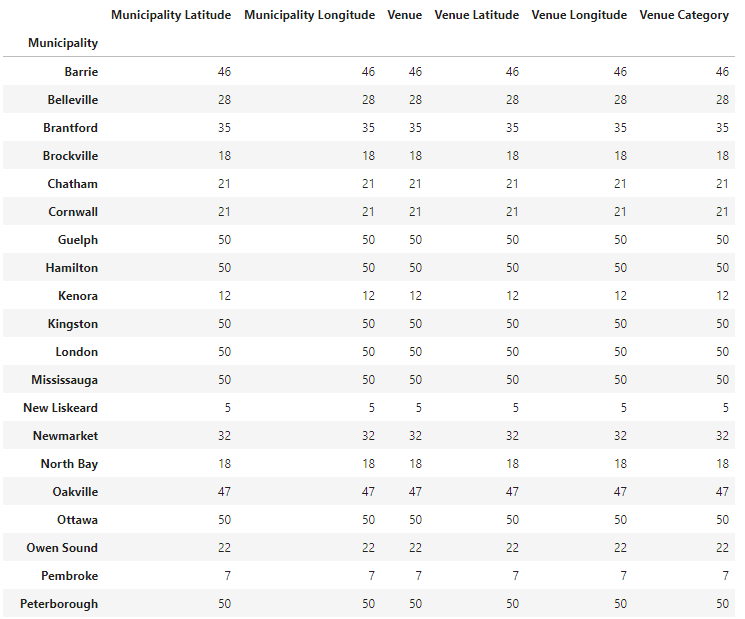

In [46]:
Image("img/foursquare.png")

### 3. Methodology

#### 3.1. Mapping the Affected Municipality using Folium Map

Folium Map is used to view of the location in Ontario where COVID-19 cases were reported

As the original location data is the location of the Public Health Unit, geopy.geocode is used to retrieve the latitude and longitude of each affected Municipality

The map is shown here below:


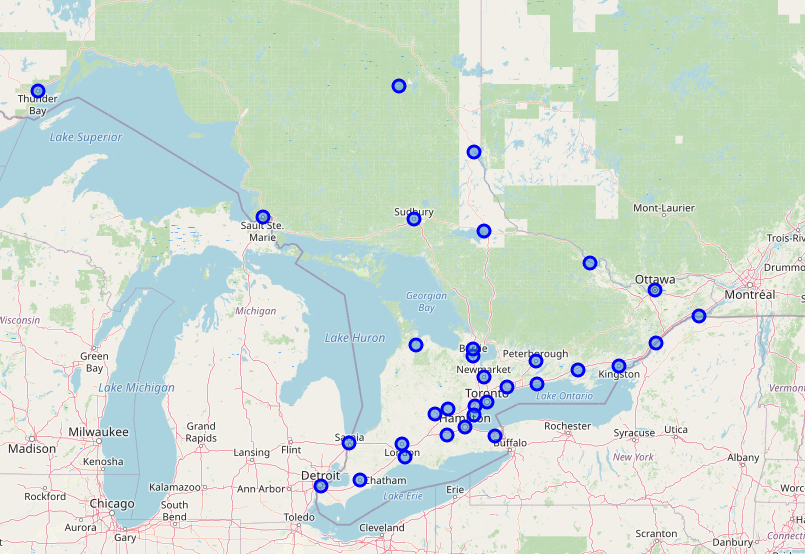

In [47]:
Image("img/foliumMap1.png")

#### 3.2. Clustering of Municipality based on Foursquare API data
The data of top 50 venues from each Municipal were retrieved using Foursquare API. In total there are 1060 rows.

The main feature of interest is the 'Venue Category'. It is a categorical data, so it needs to be converted to numerical data using one-hot encoding.

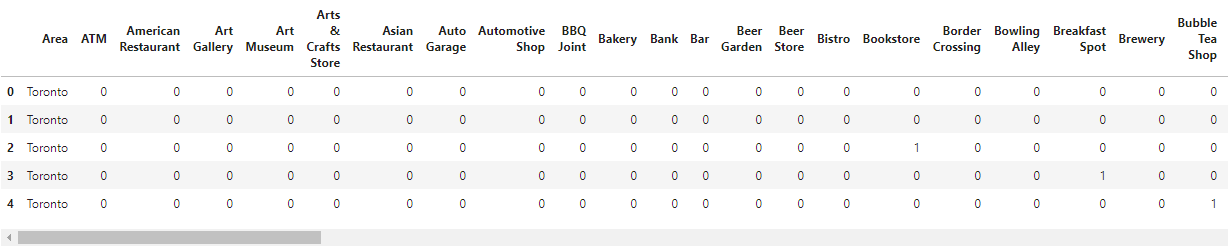

In [48]:
Image("img/onehot_1.png")

The occurence of a specific category is denoted by '1' and '0' if not. 

After, the average of occurences of category in each Municipality is taken and sorted. 

The most frequent categories in each Municipality is derived and can be shown as follows:

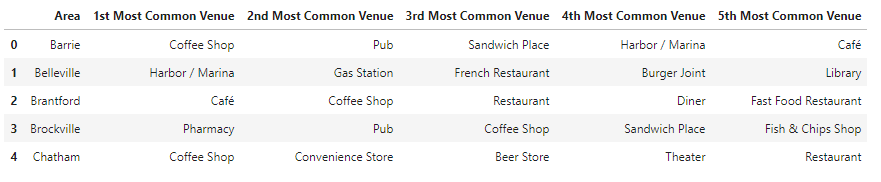

In [49]:
Image("img/most.png")

For the model, k-means clustering is used with 4 centroids.
The data is then fit into the model and then each Municipality is labeled with the corresponding cluster number

There are 4 centroids, and therefore there are 4 clusters: Cluster 0, Cluster 1, Cluster 2, and Cluster 3

Using folium Map, the cluster can be shown here, coded with different colour:

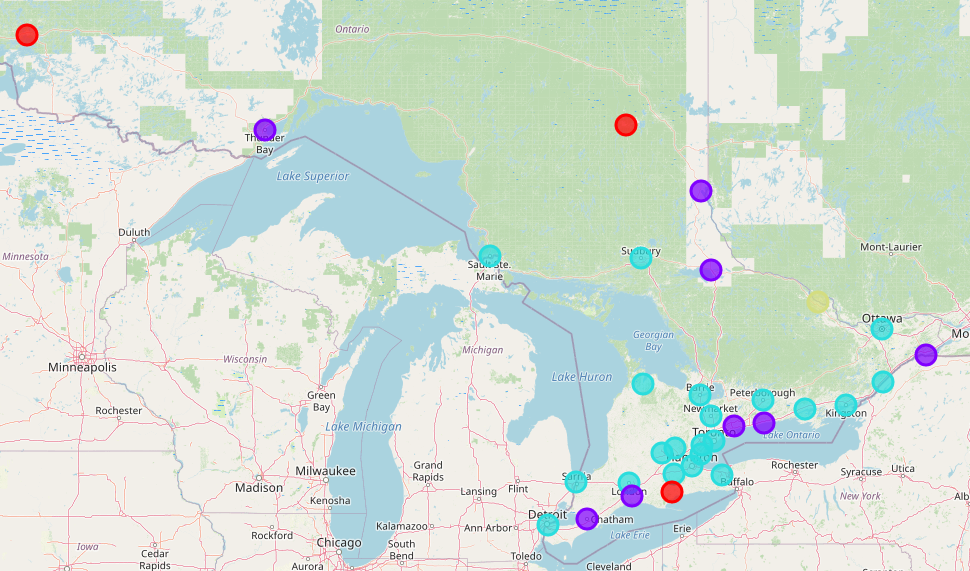

In [50]:
Image("img/foliumMap.png")

#### 3.3. Merging the Positive Cases Data with the Clustering Data
Using the COVID-19 positive cases data, the number of positive cases in each Municipal can be calculated.

The positive cases are categorized into four type of cause of infection.

For the purpose of this project, the three type are renamed as:
- 'Contact' means the cause of infection is due to the contact of a known case
- 'Travel' means the cause of infection is due to acquiring it overseas
- 'Pending' means the cause is still under investigation
- 'Neither' means it does not fall into any category, it could also mean that the source of infection is unknown.

'Contact' and 'Neither' will be looked into further because these two causes mean the infection happens in the community

Once the data is retrieved, they are merged with the cluster data.

The full merged table can be shown here below:

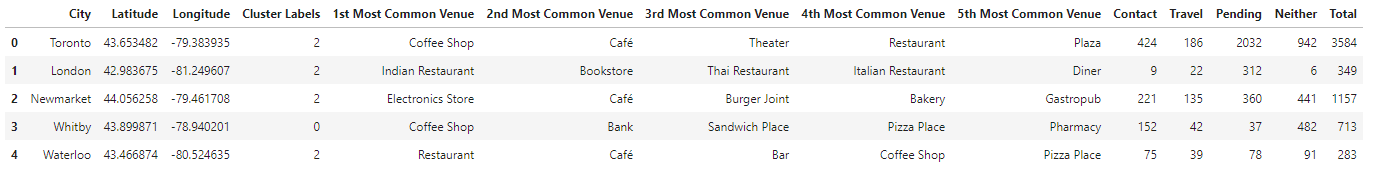

In [51]:
Image("img/merged.png")

### 4. Result

#### 4.1. Cluster Data
Each of the Municipal are put into its corresponding cluster.

##### Cluster 0 - Loves Fast Food
The first cluster groups all municipal with fast food type of restaurant as the most common venue.

 


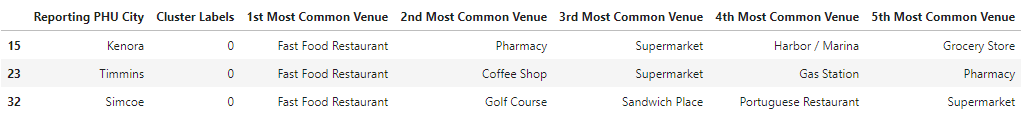

In [52]:
Image("img/cluster0.png")

##### Cluster 1 - Mix of everything
The second cluster has a quite diverse mix of venue category

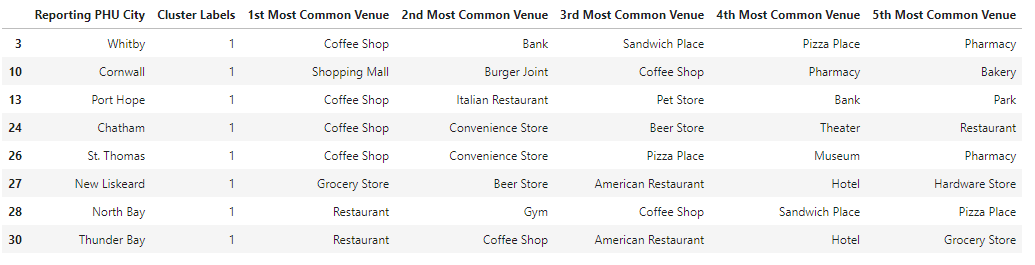

In [53]:
Image("img/cluster1.png")

##### Cluster 2 - Drink and drink
This cluster looks like a tourism place, it has good amount of coffee shop and pub as the common venue

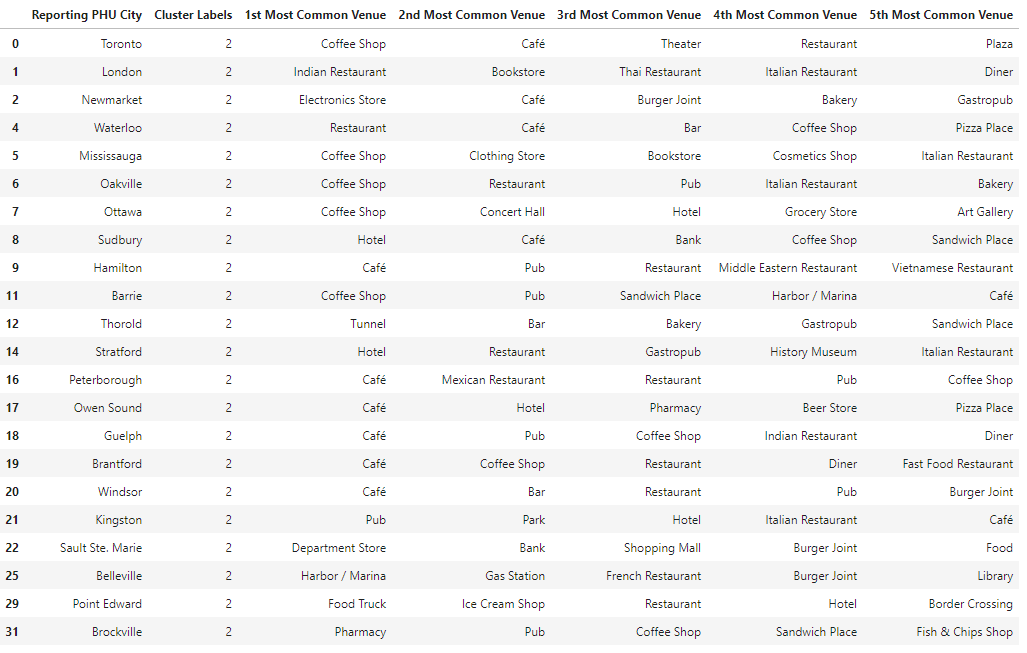

In [54]:
Image("img/cluster2.png")

##### Cluster 3 - Eating Ice Cream in Canada
The last cluster only has one municipal. This could be due to insufficient data

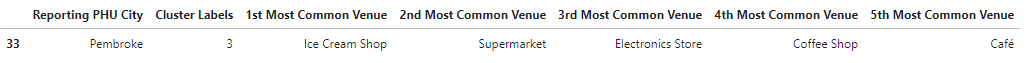

In [55]:
Image("img/cluster3.png")

#### 4.2. Calculating the Average of Positive Cases in each Cluster

Making full use of the merged data which contains the cluster data and also the total number of positive cases in each municipality, the average of positive cases in each cluster can be derived

Here are the data consisting of the positive cases in each cluster, separated into the case of infection.

##### Cluster 0

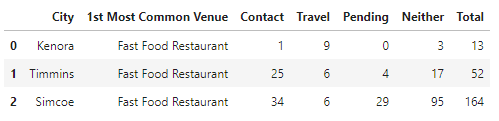

In [56]:
Image("img/cov0.png")

##### Cluster 1

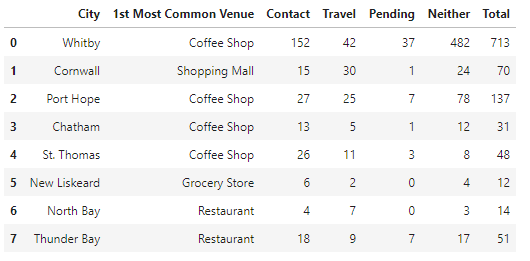

In [57]:
Image("img/cov1.png")

##### Cluster 2

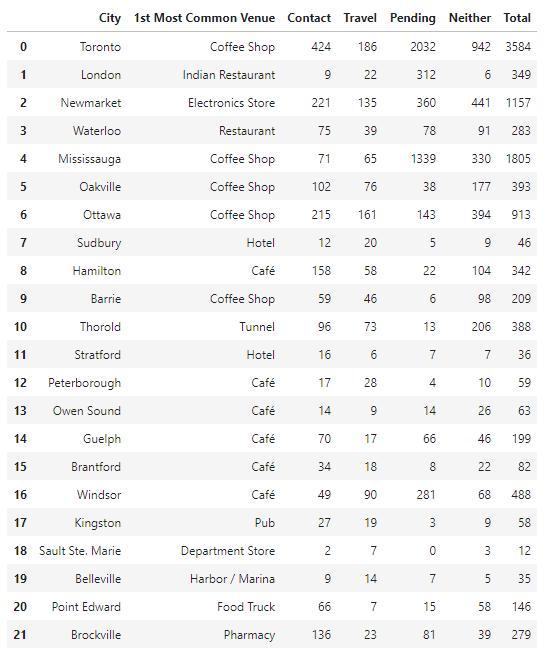

In [58]:
Image("img/cov2.png")

##### Cluster 3

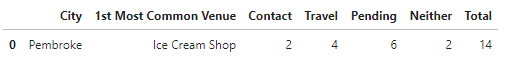

In [59]:
Image("img/cov3.png")

Based on this data, the average then calculated for each cluster

| Cluster | Num of City/Municipal | Average Total | Average Contact or Neither  |
|:-------:|:---------------------:|:-------------:|:----------------------------|
| 0       | 3   | 76.33   | 58.33  |
| 1       | 8  | 134.50  | 111.12 |
| 2       | 22  | 496.64  | 226.05 |
| 3       | 1   | 14.00   | 4.00   |


### 5. Discussion

#### 5.1. From the Result
The result shows that Cluster 2 has the most average number of infection per Municipal/City.

Just from the data, cluster 2 has a lot of public gathering places which are recommended by users on Foursquare.

The second highest average, cluster 1, also has a number of recommended venues which is related to public gathering.

It is interesting that the third highest cluster is linked to fast food restaurant. Normally people don't really hang out at a fast food restaurant. Most customers will just do take away without doing much socialization

Assuming that only Foursquare data can be depended on, public gathering increases the risk of COVID-19 transmission, and the social distancing measure makes sense

#### 5.2. Idea for Next Project
The project can be developed further by:
- Clustering not just based on Foursquare data, but also the demographic of the Municipal
- Improving the location data of each Municipal, some Municipal probably has inaccurate location
- Researching into different clustering algorithm
- etc.

### 6. Conclusion

In conclusion, just based on this small observation, COVID-19 spread can probably be linked to public gathering places where people are sharing the space, have body contact and in the same closed space for quite some time. Observation with bigger dataset and data model may give different conclusion. In any case, stay at home and stay safe